In [1]:
# 주식 데이터(삼성전자, 카카오, 네이버) 를 활용하여 주가 변동을 시각화. Numpy, Matplotlib, Pandas를 활용하여 다음을 분석합니다
# 1) 주가 변동 라인 그래프
# 삼성전자, 카카오, 네이버의 주가 변동을 하나의 그래프로 시각화
# 2) 이동 평균선 추가
# 단기(20일) 및 장기(60일) 이동 평균선을 추가하여 주가 추세를 분석
# 3)히트맵을 통한 상관관계 분석
# 삼성전자, 카카오, 네이버의 주가 상관관계를 히트맵으로 표현
# - 주식 데이터 수집 및 처리
# 삼성전자(005930), 카카오(035720), 네이버(035420)의 주가 데이터를 가져오기. - 데이터 전처리
# 수집한 데이터에서 종가(close) 정보를 추출하고, 이를 하나의 데이터프레임으로 결과
# - 주가 변동 시각화
# 각 기업의 주가 변동을 라인 그래프로 시각화
# - 이동 평균선 추가
# 주가의 단기 및 장기 추세를 파악하기 위해 20일 및 60일 이동 평균선을 계산하고 시각화- 종목 간 상관관계 분석
# 각 종목 간 주가의 상관관계를 히트맵으로 시각화

In [26]:
pip install yahoo_fin pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from yahoo_fin import stock_info as si

In [4]:
tickers = {
    '삼성전자': '005930.KS',
    '네이버': '035420.KS',
    '카카오': '035720.KS'
}

data = {}
for company, ticker in tickers.items():
    data[company] = si.get_data(ticker, start_date='2022-01-01', end_date='2025-01-01')

In [5]:
# 0402하청빈
close_prices = pd.DataFrame()
for company, df in data.items():
    close_prices[company] = df['close']

close_prices

,삼성전자,네이버,카카오
2022-01-04,78700.0,365500.0,111500.0
2022-01-05,77400.0,355000.0,105500.0
2022-01-06,76900.0,338500.0,100000.0
2022-01-07,78300.0,338000.0,100000.0
2022-01-10,78000.0,335000.0,96600.0
...,...,...,...
2024-12-23,53500.0,201000.0,39700.0
2024-12-24,54400.0,202500.0,39500.0
2024-12-26,53600.0,199900.0,38550.0
2024-12-27,53700.0,197700.0,38850.0


In [6]:
# 글씨체 설정
font_path = "C:/Windows/Fonts/gulim.ttc"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

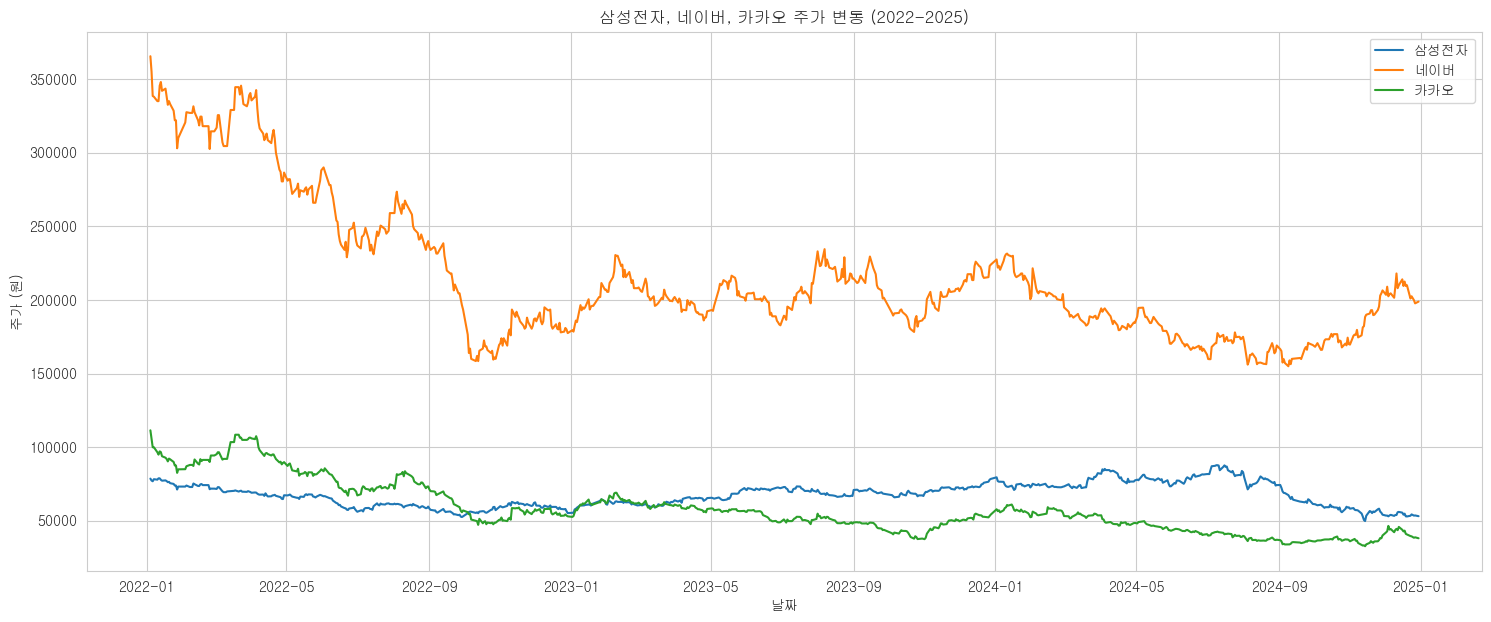

In [7]:
# 1) 주가 변동 라인 그래프 0402하청빈
# 그래프 크기 조정
plt.figure(figsize=(18, 7))
# 그래프 출력 데이터의 열에서 회사이름가져와, 데이터의 행(날짜)에 따른 데이터의 값(각 회사마다)을 그래프로 표시
for company in close_prices.columns:
    plt.plot(close_prices.index, close_prices[company], label=company)
# 그래프 범례 등 설정
plt.title('삼성전자, 네이버, 카카오 주가 변동 (2022-2025)')
plt.xlabel('날짜')
plt.ylabel('주가 (원)')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# 2) 이동 평균선 추가 #0402하청빈
# 데이터에 20일,60일 평균 데이터 추가
ma_days = [20, 60]
for ma in ma_days:
    for company in close_prices.columns:
        column_name = f'{company} {ma}'
        close_prices[column_name] = close_prices[company].rolling(window=ma).mean()

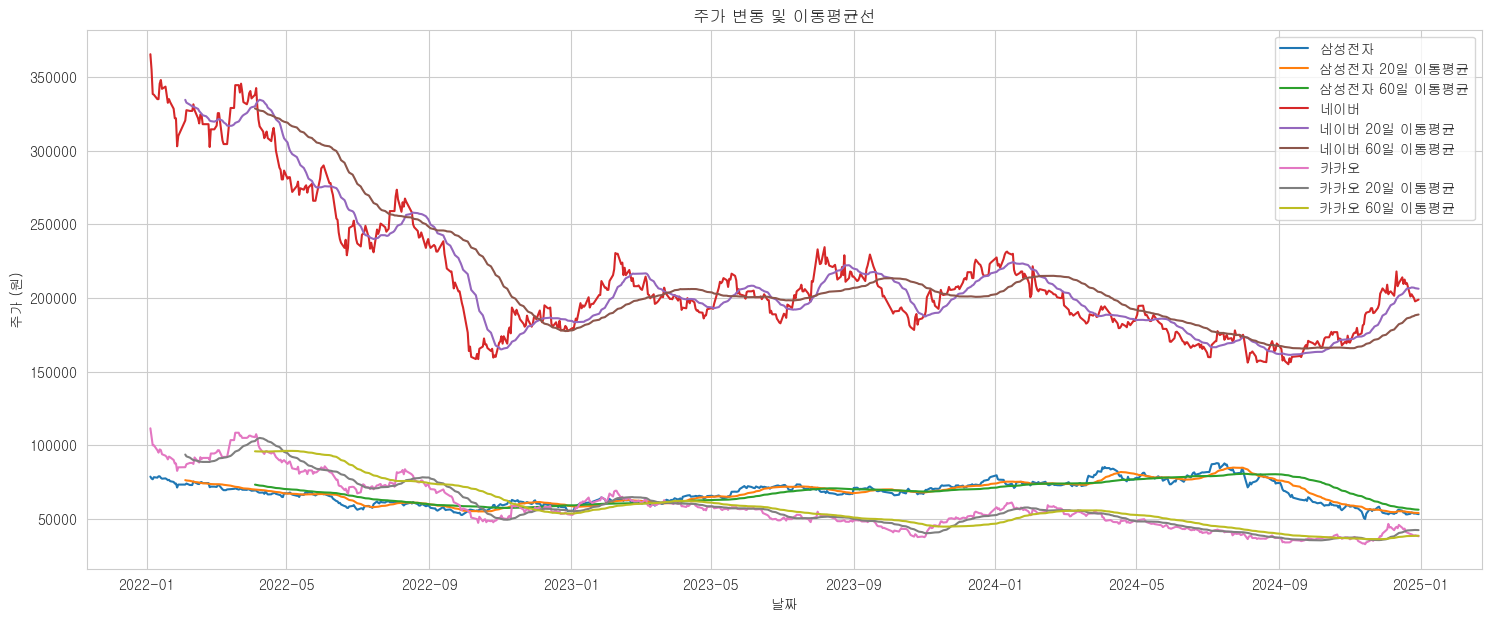

In [9]:
# 1)의 반복
plt.figure(figsize=(18, 7))
# 지금 데이터는 0:3열까지는 회사이름, 그 뒤로는 각각의 20일,60일 이평선이 추가된 상태
for company in close_prices.columns[:3]:
    plt.plot(close_prices.index, close_prices[company], label=company)
    for ma in ma_days:
        plt.plot(close_prices.index, close_prices[f'{company} {ma}'],
                 label=f'{company} {ma}일 이동평균')

plt.title('주가 변동 및 이동평균선')
plt.xlabel('날짜')
plt.ylabel('주가 (원)')
plt.legend(prop=font_prop)
plt.grid(True)
plt.show()

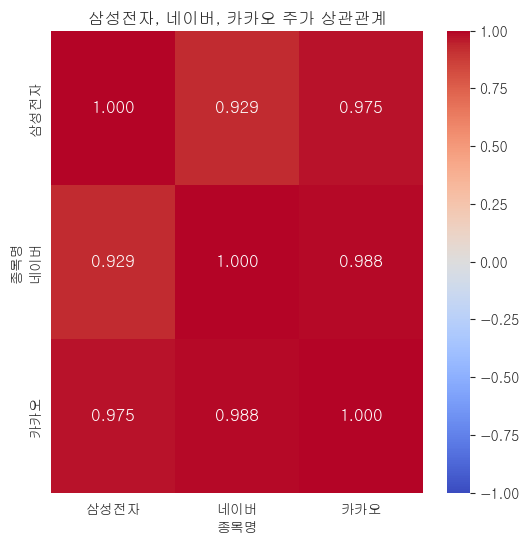

In [25]:
# 3)히트맵을 통한 상관관계 분석 0402하청빈
corr = close_prices[:3].corr().dropna(how='all').dropna(how='all',axis=1)
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"fontsize": 12, "fontproperties": font_prop}, fmt=".3f")
plt.title("삼성전자, 네이버, 카카오 주가 상관관계")
plt.xlabel("종목명")
plt.ylabel("종목명")

plt.show()